<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/ENTREGA_3_%7C%7C_CIENCIA_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar el dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CIENCIA DE DATOS/DATA_MAD.csv')
data.head()

,scheduled_flight_leg_block_off_date,scheduled_flight_leg_block_off_time,scheduled_flight_leg_block_off_date_utc,scheduled_flight_leg_block_off_time_utc,marketing_airline_code,operating_flight_num,origin_leg_iata_airport_code,destination_leg_iata_airport_code,flight_leg_registration_code,actual_flight_leg_fleet_name,...,FLIGHT_KEY,POS_DISP_TOTALES,total_pax_qty,total_capacity_leg_qty,fo_pct,pax_weight_kg_qty,pax_bags_qty,pax_bags_net_weight_kg_qty,total_pax_qty_est,maximum_payload_kg_qty
0,2024-11-06,00:45:00,2024-11-05,23:45:00,LA,2485,MAD,LIM,CCBGE,B789,...,2485MADLIM2024-11-06,36,NaN,NaN,NaN,24554.0,370.0,6842.0,296.0,49853.0
1,2024-11-06,22:40:00,2024-11-06,21:40:00,LA,8065,MAD,GRU,CCBGD,B789,...,8065MADGRU2024-11-06,36,303.0,298.0,1.016779,NaN,NaN,NaN,NaN,NaN
2,2024-11-06,15:30:00,2024-11-06,14:30:00,LA,711,MAD,BOG,CCBBF,B787,...,711MADBOG2024-11-06,28,252.0,243.0,1.037037,18571.0,224.0,3936.0,223.0,44078.0
3,2024-11-06,23:35:00,2024-11-06,22:35:00,LA,705,MAD,SCL,CCBGH,B789,...,705MADSCL2024-11-06,36,301.0,300.0,1.003333,NaN,NaN,NaN,NaN,NaN
4,2024-11-05,15:30:00,2024-11-05,14:30:00,LA,711,MAD,BOG,CCBBA,B787,...,711MADBOG2024-11-05,28,216.0,243.0,0.888889,18317.0,195.0,3744.0,219.0,43421.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Observación de valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   scheduled_flight_leg_block_off_date      3791 non-null   object 
 1   scheduled_flight_leg_block_off_time      3791 non-null   object 
 2   scheduled_flight_leg_block_off_date_utc  3791 non-null   object 
 3   scheduled_flight_leg_block_off_time_utc  3791 non-null   object 
 4   marketing_airline_code                   3791 non-null   object 
 5   operating_flight_num                     3791 non-null   int64  
 6   origin_leg_iata_airport_code             3791 non-null   object 
 7   destination_leg_iata_airport_code        3791 non-null   object 
 8   flight_leg_registration_code             3775 non-null   object 
 9   actual_flight_leg_fleet_name             3775 non-null   object 
 10  actual_flight_leg_fleet_name_code        3775 no

In [4]:
data.isnull().sum()

,0
scheduled_flight_leg_block_off_date,0
scheduled_flight_leg_block_off_time,0
scheduled_flight_leg_block_off_date_utc,0
scheduled_flight_leg_block_off_time_utc,0
marketing_airline_code,0
operating_flight_num,0
origin_leg_iata_airport_code,0
destination_leg_iata_airport_code,0
flight_leg_registration_code,16
actual_flight_leg_fleet_name,16


In [5]:
# Observación de las variables categoricas nominales determinantes y Limpieza de variables categoricas nominales que NO se tendrán en cuenta en el análisis,
# porque son tipos de aeronaves que ya NO se usan en las rutas origen MAD

data['actual_flight_leg_fleet_name'].unique()

array(['B789', 'B787', nan, 'B777', 'B767', 'A321'], dtype=object)

In [6]:
data.drop(data[data['actual_flight_leg_fleet_name'] == 'A321'].index,inplace=True)
data.drop(data[data['actual_flight_leg_fleet_name'] == 'nan'].index,inplace=True)

In [7]:
data.dropna(subset=['flight_leg_registration_code','actual_flight_leg_fleet_name','actual_flight_leg_fleet_name_code'], inplace=True)

In [8]:
data['actual_flight_leg_fleet_name'].unique()

array(['B789', 'B787', 'B777', 'B767'], dtype=object)

In [9]:
data.isnull().sum()

,0
scheduled_flight_leg_block_off_date,0
scheduled_flight_leg_block_off_time,0
scheduled_flight_leg_block_off_date_utc,0
scheduled_flight_leg_block_off_time_utc,0
marketing_airline_code,0
operating_flight_num,0
origin_leg_iata_airport_code,0
destination_leg_iata_airport_code,0
flight_leg_registration_code,0
actual_flight_leg_fleet_name,0


In [10]:
# Remplazó de los datos nulos con el promedio general de la columna; ya que no se requiere una segmentación, ya que todos los tipos de aeronave y destino comparten las mismas
# caracteristicas para el despegue.

AVG_total_pax_qty = round(data['total_pax_qty'].mean())
AVG_total_capacity_leg_qty = round(data['total_capacity_leg_qty'].mean())
AVG_fo_pct = data['fo_pct'].mean()
AVG_pax_weight_kg_qty = round(data['pax_weight_kg_qty'].mean())
AVG_pax_bags_qty = round(data['pax_bags_qty'].mean())
AVG_pax_bags_net_weight_kg_qty = round(data['pax_bags_net_weight_kg_qty'].mean())
AVG_total_pax_qty_est = round(data['total_pax_qty_est'].mean())
AVG_maximum_payload_kg_qty = round(data['maximum_payload_kg_qty'].mean())

In [11]:
data['total_pax_qty'].fillna(AVG_total_pax_qty, inplace=True)
data['total_capacity_leg_qty'].fillna(AVG_total_capacity_leg_qty, inplace=True)
data['fo_pct'].fillna(AVG_fo_pct, inplace=True)
data['pax_weight_kg_qty'].fillna(AVG_pax_weight_kg_qty, inplace=True)
data['pax_bags_qty'].fillna(AVG_pax_bags_qty, inplace=True)
data['pax_bags_net_weight_kg_qty'].fillna(AVG_pax_bags_net_weight_kg_qty, inplace=True)
data['total_pax_qty_est'].fillna(AVG_total_pax_qty_est, inplace=True)
data['maximum_payload_kg_qty'].fillna(AVG_maximum_payload_kg_qty, inplace=True)

<ipython-input-11-6518a4e46d1b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_pax_qty'].fillna(AVG_total_pax_qty, inplace=True)
<ipython-input-11-6518a4e46d1b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3772 entries, 0 to 3790
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   scheduled_flight_leg_block_off_date      3772 non-null   object 
 1   scheduled_flight_leg_block_off_time      3772 non-null   object 
 2   scheduled_flight_leg_block_off_date_utc  3772 non-null   object 
 3   scheduled_flight_leg_block_off_time_utc  3772 non-null   object 
 4   marketing_airline_code                   3772 non-null   object 
 5   operating_flight_num                     3772 non-null   int64  
 6   origin_leg_iata_airport_code             3772 non-null   object 
 7   destination_leg_iata_airport_code        3772 non-null   object 
 8   flight_leg_registration_code             3772 non-null   object 
 9   actual_flight_leg_fleet_name             3772 non-null   object 
 10  actual_flight_leg_fleet_name_code        3772 non-nul

In [13]:
data['Kg_disp_carga'] = data['maximum_payload_kg_qty'] - data['pax_bags_net_weight_kg_qty'] - data['pax_weight_kg_qty']

In [14]:
data['pos_disp_carga'] = data['POS_DISP_TOTALES'] - round(data['pax_bags_qty']/35)

In [16]:
data = data.drop(['scheduled_flight_leg_block_off_date', 'scheduled_flight_leg_block_off_time', 'scheduled_flight_leg_block_off_date_utc',
                  'scheduled_flight_leg_block_off_time_utc','marketing_airline_code','operating_flight_num','origin_leg_iata_airport_code',
                  'destination_leg_iata_airport_code','flight_leg_registration_code','actual_flight_leg_fleet_name',
                  'actual_flight_leg_fleet_name_code','FLIGHT_KEY'], axis=1)

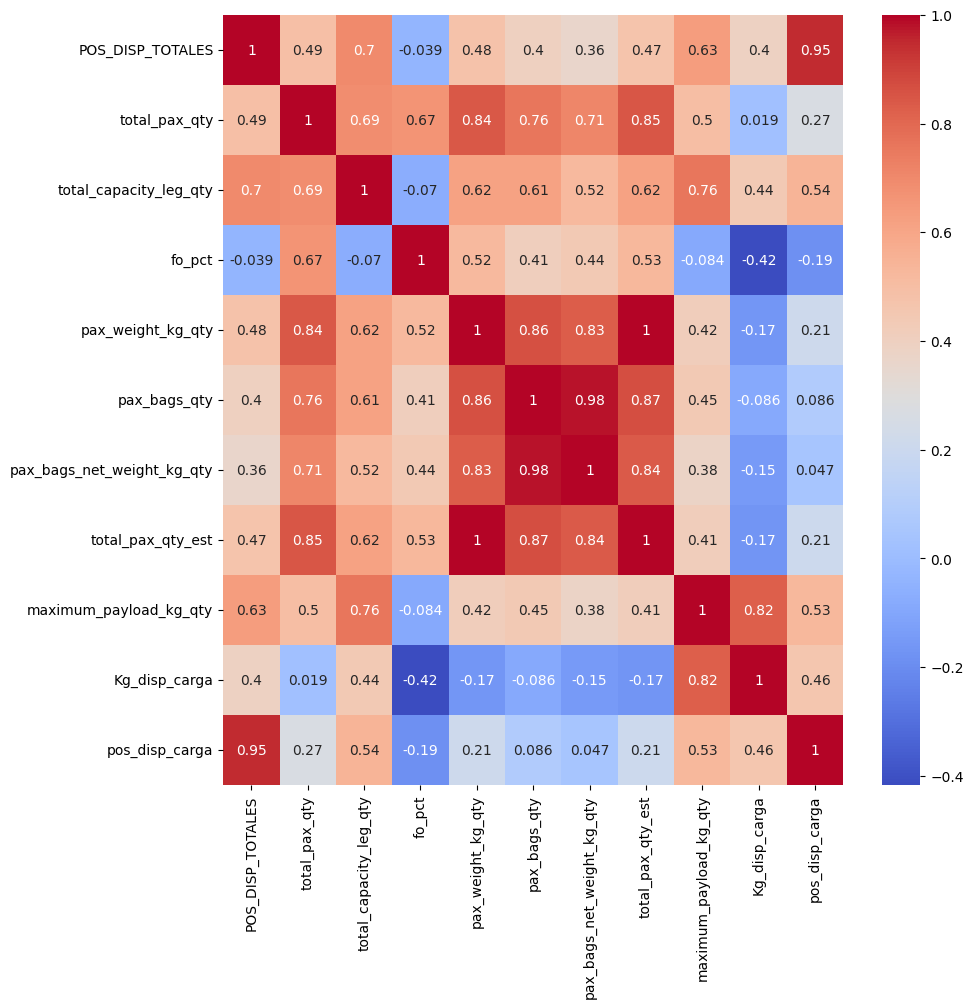

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()